##Importing required libraries like tensorflow - machine learning and neural networks framework
##Keras - Inside a tensorflow it runs deep learning algorithms like neural networks and high-level deep learning frameworks

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras import Sequential

##Importing dataset mnist - It's a handwritten digits database

In [2]:
mnist = keras.datasets.mnist

##We can download and importing dataset from open source storage google apis and load

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


##shape of the dataset

##training data

In [4]:
x_train.shape

(60000, 28, 28)

##testing data

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
np.min(x_train)

0

In [8]:
np.max(x_train)

255

##Recognize the handwritten digit from training dataset over 60,000 records from the mnist dataset

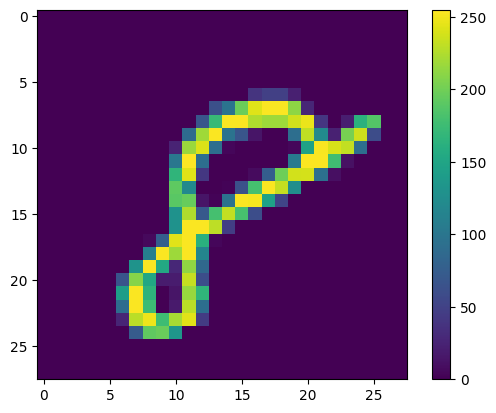

In [9]:
plt.figure()
plt.imshow(x_train[59999])
plt.colorbar()

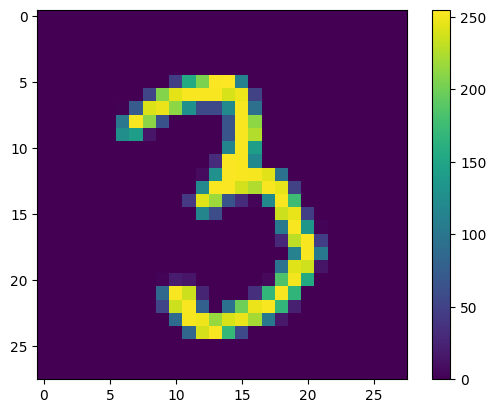

In [10]:
plt.figure()
plt.imshow(x_train[30000])
plt.colorbar()

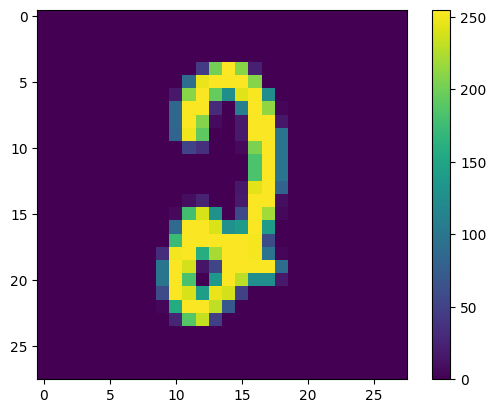

In [11]:
plt.figure()
plt.imshow(x_train[1998])
plt.colorbar()

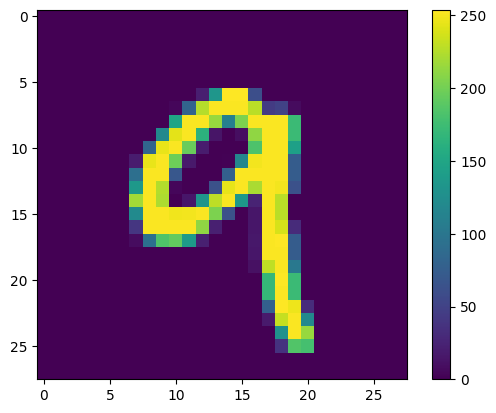

In [12]:
plt.figure()
plt.imshow(x_train[110])
plt.colorbar()

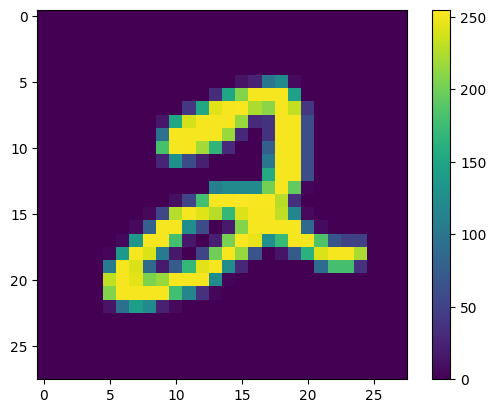

In [13]:
plt.figure()
plt.imshow(x_train[5])
plt.colorbar()

In [14]:
X_train = x_train/255.0
X_test = x_test/255.0

In [15]:
np.min(X_train)

0.0

In [16]:
np.max(X_train)

1.0

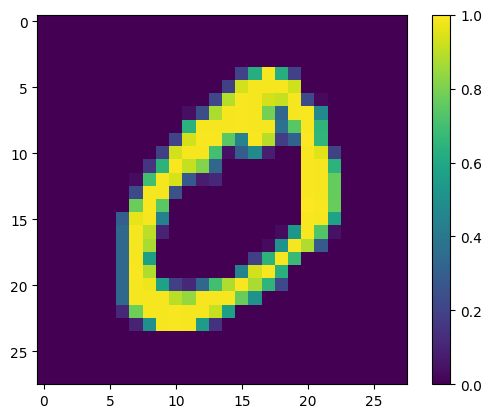

In [17]:
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()

##Use activations functions to calculate the function over in a neural network

In [18]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [19]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


##Metrics

In [20]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy", metrics=["accuracy"])

##To train the model we use .fit method

In [21]:
model.fit(X_train,y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 0.2546 - accuracy: 0.9273
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1145 - accuracy: 0.9658
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0795 - accuracy: 0.9758
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0600 - accuracy: 0.9815
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0464 - accuracy: 0.9853
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0365 - accuracy: 0.9892
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0299 - accuracy: 0.9909
Epoch 8/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0225 - accuracy: 0.9936
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0197 - accuracy: 0.9934
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0

In [22]:
test_loss,accuracy = model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0735 - accuracy: 0.9789


##Accuracy of the model

In [23]:
print(accuracy)

0.9789000153541565


1/1 [==============================] - 0s 82ms/step


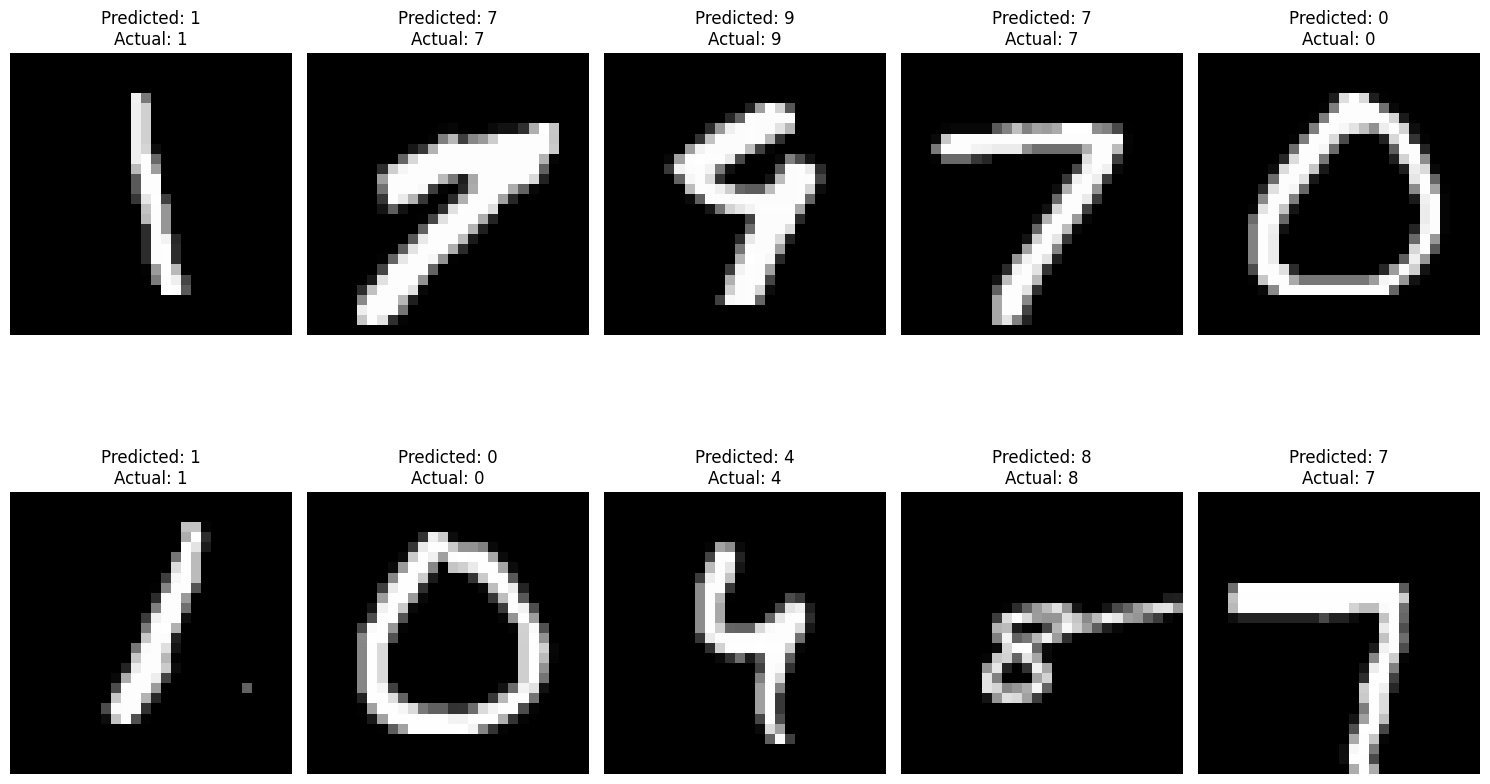

In [24]:
num_samples = 10
random_indices = np.random.choice(X_test.shape[0], num_samples, replace=False)
sample_images = X_test[random_indices]
sample_labels = y_test[random_indices]

predictions = model.predict(sample_images)
predicted_labels = np.argmax(predictions, axis=1)

# Display predictions and ground truth labels
plt.figure(figsize=(15, 10))
for i in range(num_samples):
    plt.subplot(2, num_samples // 2, i + 1)
    plt.imshow(sample_images[i], cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}\nActual: {sample_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()